# Advanced Macro II
## Real-Business-Cycle Model
[Romer, David. (2019). Advanced Macroeconomics. New York: McGraw-Hill/Irwin.](https://www.mheducation.com/highered/product/advanced-macroeconomics-romer/M9781260185218.html)

In this notebook, you will compute and and plot impulse responses for shocks to technology and government spending according to a real-business cycle model. For the theory behind this notebook, see Romer (2019), chapter 5, *Real-Business-Cycle Theory*. The key equations are below. Their derivation and explanation is in the book.

### Key equations for the log-deviations from trend
Consumption and employment (eq. (5.51) and (5.52)):

$$ \begin{aligned}
\tilde{C}_{t+1} \simeq a_{CK} \tilde{K}_{t+1} + a_{CA} \tilde{A}_{t+1} + a_{CG} \tilde{G}_{t+1} \\
\tilde{L}_{t+1} \simeq a_{LK} \tilde{K}_{t+1} + a_{LA} \tilde{A}_{t+1} + a_{LG} \tilde{G}_{t+1}
\end{aligned}$$

Capital (eq. (5.53)):

$$ \tilde{K}_{t+1} \simeq b_{KK} \tilde{K}_{t} + b_{KA} \tilde{A}_{t} + b_{KG} \tilde{G}_{t} $$

Technology and government spending (eq. (5.9) and (5.11)):

$$ \begin{aligned}
\tilde{A}_{t+1} \simeq \rho_A \tilde{A}_{t} \\
\tilde{G}_{t+1} \simeq \rho_G \tilde{G}_{t}
\end{aligned}$$

Output (eq. (5.54)):

$$ \tilde{Y}_t = \alpha \tilde{K}_t + (1 - \alpha) (\tilde{L}_t + \tilde{A}_t) $$

### Computing the impulse responses
With these key equations, we discuss the solution algorithm. Notice that we have two types of equations:
1. Equations for the evolution of the state variables, in which time subscripts on the right hand side are smaller than those on the left-hand side ($\tilde{A}_{t+1}$, $\tilde{G}_{t+1}$, and $\tilde{K}_{t+1}$)
2. Equations for the controls and thus output, in which time subscripts of both sides of the equation are equal ($\tilde{C}_{t+1}$, $\tilde{L}_{t+1}$, and $\tilde{Y}_t$)

Using starting values (either the ones on the balanced growth path, or those implied by setting the initial value of the specific shocks, e.g. $\tilde{A}_0 = 1$ to retrieve the impact of a $1\%$ technology shock), we can iterate over the time periods $t = 1, 2, \dots, T$ and compute the value of each variable in the above equations based on the value we computed in the last iteration (or based on the the initial values in the first iteration). Note that it is crucial to start by computing the log-deviations of the state variables $\tilde{A}_t$, $\tilde{G}_t$, and $\tilde{K}_t$ because these values are needed **in the same time iteration** for the computation of the log-deviations of the control variables $\tilde{C}_{t}$ and $\tilde{L}_{t}$, and thus $\tilde{Y}_t$ 

**Note on the units:** because the variables are log-deviations from the balanced growth path, a deviation of $1$ denotes approximately a deviation of $1\%$.

Let's start with a short example, illustrating the effect of a technology shock on the deviation of technology from the steady state.

In [1]:
# Before we start, import a linear algebra and plotting library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 40                    # Number of periods we consider
rho_A = 0.95              # AR(1) coefficient of technology shock, taken from chapter 5.7
A = np.zeros(T)           # Create a Tx1 vector of zeros
A[0] = 1                  # Set the first element of this vector to 1 (this is the technology shock of 1%)
for t in range(1, T):     # Iterate over the time periods and fill the vector progressively
    A[t] = rho_A * A[t-1] # Compute the element of the vector according to the formula for technology above

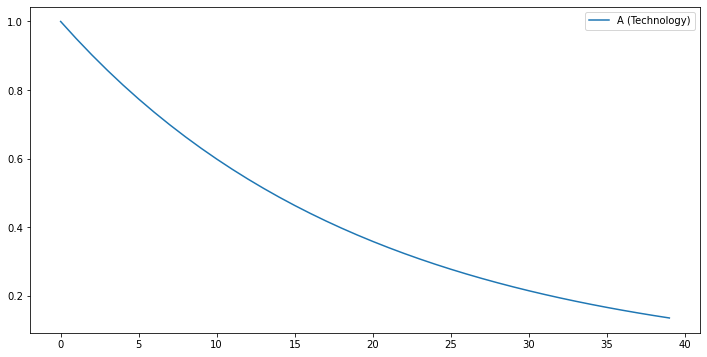

In [3]:
# Plot the results to see what A looks like
plt.figure(figsize=(12,6))  # Define plot size
plt.plot(A, label = "A (Technology)") # Plot path of technology
plt.legend() # Add the legend top right
plt.show() # Display the plot

We see how $\tilde{A}_t$ gradually decays to $0$ as $t$ increases, as expected given the autocorrelation coeficient which is less than 1. Now let's compute all the variables which characterize the dynamic equilibrium of the economy.

### Set the deep parameters (for preferences and technology) as in chapter 5.7 in Romer.

You can also change these parameters and re-run the notebook to see how this affects the equilibrium of the economy!

In [4]:
# Set the deep parameters as in chapter 5.7
T = 40        # Number of periods
alpha = 1/3   # Cobb-Douglas parameter (calibrated to the capital share of output)
g = 0.005     # Productivity growth rate
n = 0.0025    
r = 0.015     # Interest rate
GY = 0.2      # Ratio of G to Y on the balanced growth path
l = 1/3       # Labor supply on the balanced growth path
delta = 0.025 # Depreciation rate
rho_A = 0.95  # AR(1) coefficient of technology shock
rho_G = 0.95  # AR(1) coefficient of government spending shock

### Calculate coefficients of the key equations 

The following step is necessary to express coefficients $a_{CK}, a_{LK}, a_{CA}, a_{LA}, a_{CG}, a_{LG}, b_{KK}, b_{KA}, b_{KG}$ in the key equations as functions of the deep parameters. This allows us to fully characterize the model in terms of the parameters (and thus change them to see how this impacts the equilibrium). However, solving a system of equations with Python is not the goal of this lab session. Consequently the code is not discussed in detail.

To find out how to derive these equations, follow chapter 5.6 and solve exercise 5.15.

In [9]:
# Import the solver library
import sympy as sym
# Set up the lambda values
lambda_1 = (1+r)/np.exp(n+g)
lambda_2 = (1-alpha)*(r+delta)/(alpha*np.exp(n+g))
lambda_3 = -(r+delta)*GY/(alpha*np.exp(n+g))
# Pre-compute and store some factors that repeat across equations below for better code legibility
lambda_4 = (1-alpha)*(r+delta)/(1+r)
lambda_5 = l/(1-l)+alpha

In [10]:
# Determine the system of equations and solve it using sympy
a_CK, a_LK = sym.symbols('a_CK, a_LK')
a_CA, a_LA = sym.symbols('a_CA, a_LA')
a_CG, a_LG = sym.symbols('a_CG, a_LG')
eq1 = sym.Eq(((1-alpha)*(r+delta)/(1+r)*a_LK-lambda_4-a_CK)*(lambda_1+lambda_2*a_LK+(1-lambda_1-lambda_2-lambda_3)*a_CK), -a_CK)
eq2 = sym.Eq(((1-alpha)*(r+delta)/(1+r)*a_LK-lambda_4-a_CK)*(lambda_2*(1+a_LA)+(1-lambda_1-lambda_2-lambda_3)*a_CA)+rho_A*(lambda_4*(1+a_LA)-a_CA), -a_CA)
eq3 = sym.Eq(((1-alpha)*(r+delta)/(1+r)*a_LK-lambda_4-a_CK)*(lambda_2*a_LG+lambda_3+(1-lambda_1-lambda_2-lambda_3)*a_CG)+rho_G*(lambda_4*a_LG-a_CG), -a_CG)
eq4 = sym.Eq(a_CK+lambda_5*a_LK, alpha)
eq5 = sym.Eq(a_CA+lambda_5*a_LA, 1-alpha)
eq6 = sym.Eq(a_CG+lambda_5*a_LG, 0)
result = sym.solve([eq1, eq2, eq3, eq4, eq5, eq6])

In [11]:
# Extract the parameters from the result
a_CK = result[0][a_CK]
a_LK = result[0][a_LK]
a_CA = result[0][a_CA]
a_LA = result[0][a_LA]
a_CG = result[0][a_CG]
a_LG = result[0][a_LG]
# Compute the parameters for equation (5.53)
b_KK = lambda_1 + lambda_2 * a_LK + (1 - lambda_1 - lambda_2 - lambda_3) * a_CK
b_KA = lambda_2 * (1 + a_LA) + (1 - lambda_1 - lambda_2 - lambda_3) * a_CA
b_KG = lambda_2 * a_LG + lambda_3 + (1 - lambda_1 - lambda_2 - lambda_3) * a_CG

### Effect of a 1% shock to technology

In [31]:
# Initialize empty Tx1 vectors for all variables of interest
A = np.zeros(T)
G = np.zeros(T)
K = np.zeros(T)
C = np.zeros(T)
L = np.zeros(T)
Y = np.zeros(T)
w = np.zeros(T)
ir = np.zeros(T)

In [32]:
# Add a 1% techonology shock to the first period
A[0] = 1

In [33]:
# Iterate over the periods and compute the variables sequentially
for t in range(T):
    if t > 0:
        # Variables which only need values from the past iteration (state variables)
        A[t] = rho_A * A[t-1]                                # Eq. (5.9)
        G[t] = rho_G * G[t-1]                                # Eq. (5.11)
        K[t] = b_KK * K[t-1] + b_KA * A[t-1] + b_KG * G[t-1] # Eq. (5.53)
    # Variables which need the variables just computed in this same iteration (control variables and output)
    C[t] = a_CK * K[t] + a_CA * A[t] + a_CG * G[t]           # Eq. (5.51)
    L[t] = a_LK * K[t] + a_LA * A[t] + a_LG * G[t]           # Eq. (5.52)
    Y[t] = alpha * K[t] + (1 - alpha) * (L[t] + A[t])        # Eq. (5.54)
    w[t] = (1 - alpha) * A[t] + alpha * K[t] - alpha * L[t]  # Eq. (5.46)
    ir[t] = 4*(1-alpha)*(r+delta)/(1+r) *(A[t] + L[t] - K[t])

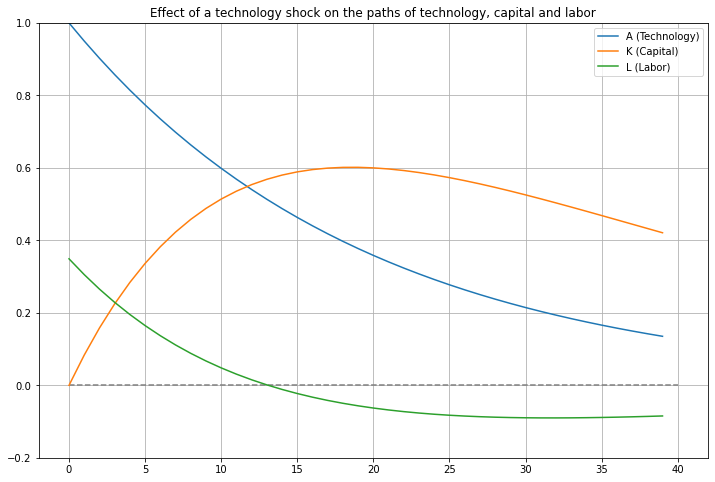

In [34]:
# Plot the results
plt.figure(figsize=(12,8))  # Define plot size
plt.grid()
plt.plot(A, label = "A (Technology)") # Plot path of technology
plt.plot(K, label = "K (Capital)")    # Plot path of capital
plt.plot(L, label = "L (Labor)")      # Plot path of labor
# Add a horizontal line at zero
plt.hlines(0, 0, T, linestyles = "dashed", colors = "grey") 
plt.legend() # Add the legend (A, K, L) top right
# Scale the y-axis similarly to what is found in the book
plt.axis(ymin = -0.2, ymax = 1)
# Add a title
plt.title("Effect of a technology shock on the paths of technology, capital and labor")
plt.show() # Display the plot

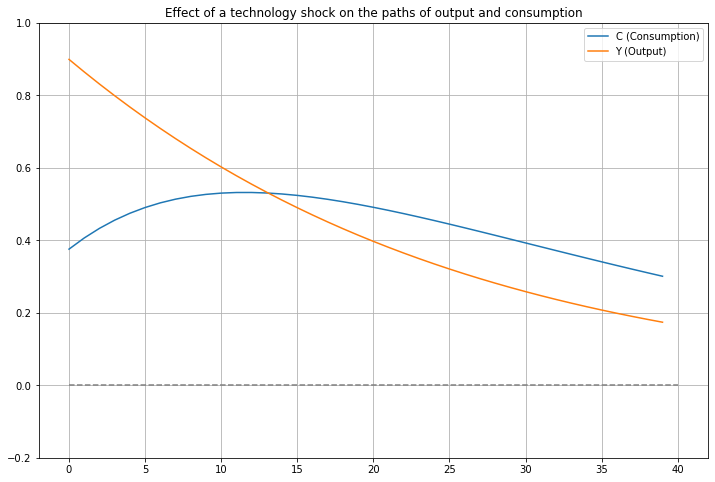

In [35]:
# Plot the results
plt.figure(figsize=(12,8))  # Define plot size
plt.grid()
plt.plot(C, label = "C (Consumption)")  # Plot path of consumption
plt.plot(Y, label = "Y (Output)")       # Plot path of output
# Add a horizontal line at zero
plt.hlines(0, 0, T, linestyles = "dashed", colors = "grey") 
plt.legend() # Add the legend (C, Y) top right
# Scale the y-axis similarly to what is found in the book
plt.axis(ymin = -0.2, ymax = 1)
# Add a title
plt.title("Effect of a technology shock on the paths of output and consumption")
plt.show() # Display the plot

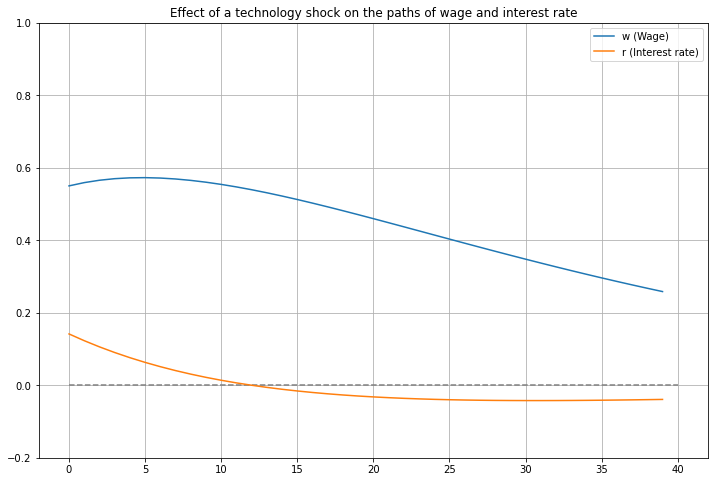

In [36]:
# Plot the results
plt.figure(figsize=(12,8))  # Define plot size
plt.grid()
plt.plot(w, label = "w (Wage)")          # Plot path of wage
plt.plot(ir, label = "r (Interest rate)") # Plot path of interest rate
# Add a horizontal line at zero
plt.hlines(0, 0, T, linestyles = "dashed", colors = "grey") 
plt.legend() # Add the legend (C, Y) top right
# Scale the y-axis similarly to what is found in the book
plt.axis(ymin = -0.2, ymax = 1)
# Add a title
plt.title("Effect of a technology shock on the paths of wage and interest rate")
plt.show() # Display the plot

### Effect of a 1% shock to government spending

In [37]:
# Initialize empty Tx1 vectors for all variables of interest
A = np.zeros(T)
G = np.zeros(T)
K = np.zeros(T)
C = np.zeros(T)
L = np.zeros(T)
Y = np.zeros(T)
w = np.zeros(T)
ir = np.zeros(T)

In [38]:
# Add a 1% government spending shock to the first period
G[0] = 1

In [39]:
# Iterate over the periods and compute the variables sequentially
for t in range(T):
    if t > 0:
        # Variables which only need values from the past iteration (state variables)
        A[t] = rho_A * A[t-1]                                # Eq. (5.9)
        G[t] = rho_G * G[t-1]                                # Eq. (5.11)
        K[t] = b_KK * K[t-1] + b_KA * A[t-1] + b_KG * G[t-1] # Eq. (5.53)
    # Variables which need the variables just computed in this same iteration (control variables and output)
    C[t] = a_CK * K[t] + a_CA * A[t] + a_CG * G[t]           # Eq. (5.51)
    L[t] = a_LK * K[t] + a_LA * A[t] + a_LG * G[t]           # Eq. (5.52)
    Y[t] = alpha * K[t] + (1 - alpha) * (L[t] + A[t])        # Eq. (5.54)
    w[t] = (1 - alpha) * A[t] + alpha * K[t] - alpha * L[t]  # Eq. (5.46)
    ir[t] = 4*(1-alpha)*(r+delta)/(1+r) *(A[t] + L[t] - K[t])

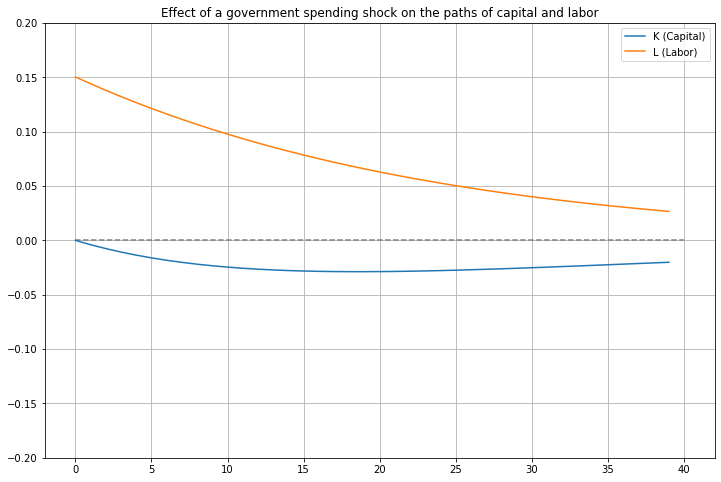

In [40]:
# Plot the results
plt.figure(figsize=(12,8))  # Define plot size
plt.grid()
plt.plot(K, label = "K (Capital)")    # Plot path of capital
plt.plot(L, label = "L (Labor)")      # Plot path of labor
# Add a horizontal line at zero
plt.hlines(0, 0, T, linestyles = "dashed", colors = "grey") 
plt.legend() # Add the legend (A, K, L) top right
# Scale the y-axis similarly to what is found in the book
plt.axis(ymin = -0.2, ymax = 0.2)
# Add a title
plt.title("Effect of a government spending shock on the paths of capital and labor")
plt.show() # Display the plot

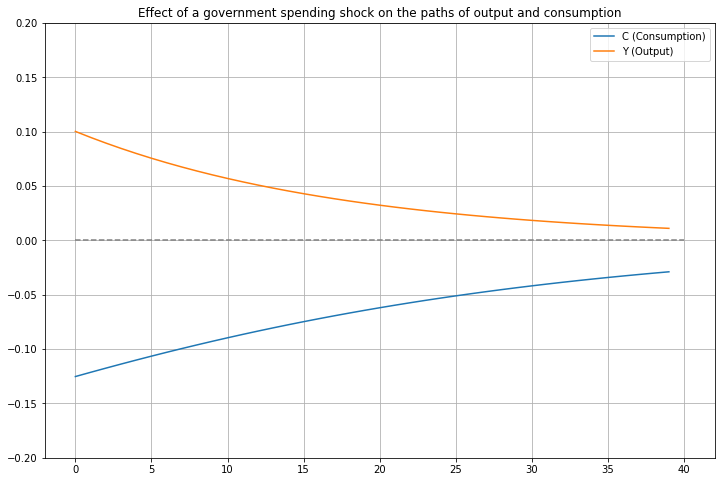

In [41]:
# Plot the results
plt.figure(figsize=(12,8))  # Define plot size
plt.grid()
plt.plot(C, label = "C (Consumption)")  # Plot path of consumption
plt.plot(Y, label = "Y (Output)")       # Plot path of output
# Add a horizontal line at zero
plt.hlines(0, 0, 40, linestyles = "dashed", colors = "grey") 
plt.legend() # Add the legend (C, Y) top right
# Scale the y-axis similarly to what is found in the book
plt.axis(ymin = -0.2, ymax = 0.2)
# Add a title
plt.title("Effect of a government spending shock on the paths of output and consumption")
plt.show() # Display the plot

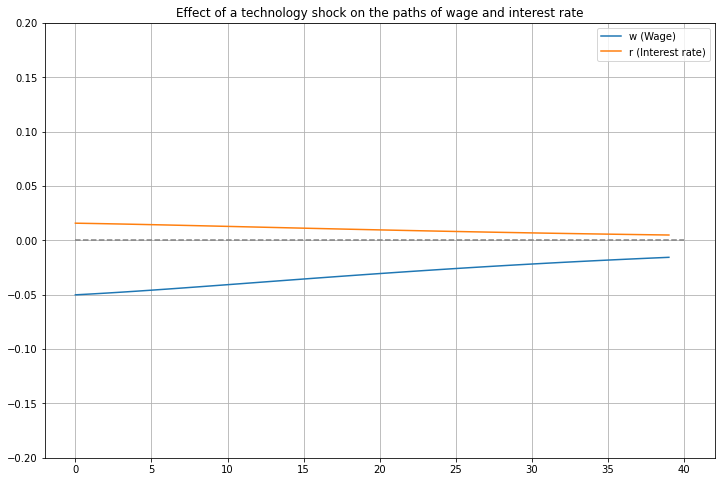

In [42]:
# Plot the results
plt.figure(figsize=(12,8))  # Define plot size
plt.grid()
plt.plot(w, label = "w (Wage)")          # Plot path of wage
plt.plot(ir, label = "r (Interest rate)") # Plot path of interest rate
# Add a horizontal line at zero
plt.hlines(0, 0, T, linestyles = "dashed", colors = "grey") 
plt.legend() # Add the legend (C, Y) top right
# Scale the y-axis similarly to what is found in the book
plt.axis(ymin = -0.2, ymax = 0.2)
# Add a title
plt.title("Effect of a technology shock on the paths of wage and interest rate")
plt.show() # Display the plot

## Bonus: IPywidgets and interactive plots
[IPywidgets](https://ipywidgets.readthedocs.io/en/latest/index.html) lets you build interactive GUI within your notebook. 

It can be pretty useful if you want to observe how something changes with its inputs or when you have to present the results of your data exploration to your peers as you can just modify the inputs and have the results refresh automatically. To apply this, you need to understand what functions are in Python and how they work.

In [43]:
# Import the necessary module to use IPywidgets
import ipywidgets as widgets

In [49]:
# Create a function taking the number of periods and the shock to technology and to government spending as parameters
# This follows the same logic as what we did above but packed in a function, allowing to simply pass 3 parameters
def balanced_growth_path(T, shock_A, shock_G):
    # Initialize empty Tx1 vectors for all variables of interest
    A = np.zeros(T)
    G = np.zeros(T)
    K = np.zeros(T)
    C = np.zeros(T)
    L = np.zeros(T)
    Y = np.zeros(T)
    w = np.zeros(T)
    ir = np.zeros(T)
    G[0] = shock_G
    A[0] = shock_A
    # Iterate over the periods and compute the variables sequentially (exact same as above)
    for t in range(1, T):
        if t > 0:
            # Variables which only need values from the past iteration (state variables)
            A[t] = rho_A * A[t-1]                                # Eq. (5.9)
            G[t] = rho_G * G[t-1]                                # Eq. (5.11)
            K[t] = b_KK * K[t-1] + b_KA * A[t-1] + b_KG * G[t-1] # Eq. (5.53)
        # Variables which need the variables just computed in this same iteration (control variables and output)
        C[t] = a_CK * K[t] + a_CA * A[t] + a_CG * G[t]       # Eq. (5.51)
        L[t] = a_LK * K[t] + a_LA * A[t] + a_LG * G[t]       # Eq. (5.52)
        Y[t] = alpha * K[t] + (1 - alpha) * (L[t] + A[t])    # Eq. (5.54)
        w[t] = (1 - alpha) * A[t] + alpha * K[t] - alpha * L[t]  # Eq. (5.46)
        ir[t] = 4*(1-alpha)*(r+delta)/(1+r) *(A[t] + L[t] - K[t])
    return A, G, K, C, L, Y    

In [50]:
# Create a function which takes in the number of periods as well as both the shock to technology and government spending as input
# Additionally, this function takes in a list called `variables_to_plot`. The function will plot a graph according to the variables passed in this list
def plot_bgp(T, shock_A, shock_G, variables_to_plot):
    # Compute the variables using the function we defined above
    A, G, K, C, L, Y = balanced_growth_path(T, shock_A, shock_G)
    # Plot the results
    plt.figure(figsize=(12,8))  # Define plot size
    plt.grid()
    # Plot path of technology
    if "A" in variables_to_plot:
        plt.plot(A[:-1], label = "A (Technology)")
    # Plot path of government spending
    if "G" in variables_to_plot:
        plt.plot(G[:-1], label = "G (Government spending)")
    # Plot path of capital
    if "K" in variables_to_plot:
        plt.plot(K[:-1], label = "K (Capital)")   
    # Plot path of labor
    if "L" in variables_to_plot:
        plt.plot(L[1:], label = "L (Labor)")
    # Plot path of output
    if "Y" in variables_to_plot:
        plt.plot(Y[1:], label = "Y (Output)")
    # Plot path of consumption
    if "C" in variables_to_plot:
        plt.plot(C[1:], label = "C (Consumption)")
    # Plot path of wage
    if "w" in variables_to_plot:
        plt.plot(w[1:], label = "w (Wage)")
    # Plot path of interest rate
    if "r" in variables_to_plot:
        plt.plot(C[1:], label = "r (Interest rate)")
    # Add a horizontal line at zero
    plt.hlines(0, 0, T, linestyles = "dashed", colors = "grey") 
    if len(variables_to_plot):
        plt.legend() # Add the legend (A, K, L) top right
    # Add a title
    plt.title("Effect of a government spending shock on the paths of capital and labor")
    plt.show() # Display the plot

In [53]:
# Create a slider to choose the number of periods, ranging from 10 to 200, initialized at 40
slider_time = widgets.IntSlider(value = 40, min = 10, max = 200)
# Create a slider to choose the shock to government spending, from 0% to 5%
slider_shock_G = widgets.FloatSlider(min = 0, max = 5)
# Create a slider to choose the shock to technology, from 0% to 5%
slider_shock_A = widgets.FloatSlider(min = 0, max = 5)
# Create a selection box containing the variables we can choose from to add to the plot
variables_to_plot = widgets.SelectMultiple(options={"Technology": "A", "Government spending": "G",
                                                    "Capital": "K", "Consumption": "C", "Labor": "L", "Output": "Y",
                                                    "Wage": "w", "Interest rate": "r"},
                                          layout=widgets.Layout(height = "180px"))

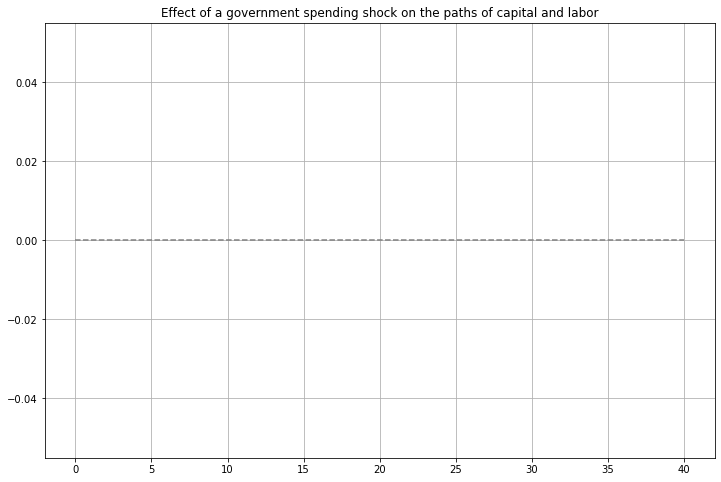

<function __main__.plot_bgp(T, shock_A, shock_G, variables_to_plot)>

In [54]:
# Display the full widget
widgets.interact(plot_bgp, T = slider_time, shock_A = slider_shock_A, shock_G = slider_shock_G, variables_to_plot = variables_to_plot)